In [250]:
import os
import cv2
import random 
import numpy as np
import matplotlib.pyplot as plt
from image_processing import *

11


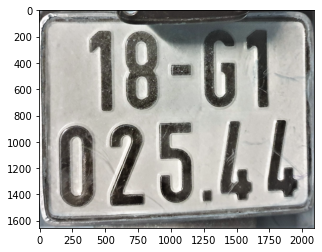

In [251]:
#path = 'bienso'
#path = 'cropped_img'
path = 'BiensoxeVH'
file_list = os.listdir(path)
# file_list = os.listdir('bienso')

n = random.randrange(len(file_list))
n = 11
print(n)
img = cv2.imread(path+'/' + file_list[n])
img = cv2.imread(path+'/20201226_002431.jpg')
plt.imshow(img)

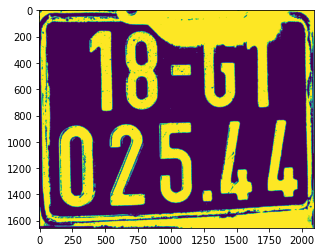

In [252]:
plt.imshow(cvt2bin(img))

In [253]:
rate = 80 / img.shape[1]
img_resized = cv2.resize(img, (0, 0), fx=rate, fy=rate)
img_resized.shape

(63, 80, 3)

(63, 80, 3)


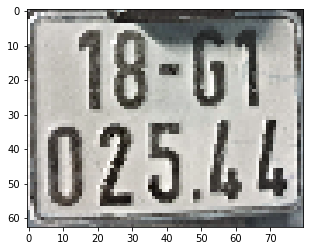

In [254]:
rate = 80 / img.shape[1]
img_resized = cv2.resize(img, (0, 0), fx=rate, fy=rate)
img_resized.shape
plt.imshow(img_resized)
print(img_resized.shape)

In [255]:
def remove_boundary(img):
    img2 = img.copy()
    img2 = cv2.morphologyEx(img2,
                            cv2.MORPH_OPEN,
                            cv2.getStructuringElement(cv2.MORPH_RECT, (3,1)))
    img2[:10, :10] = 0
    contours, _ = cv2.findContours(img2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    img3 = img.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if x in (0, img2.shape[1]-w) or y in (0, img2.shape[0]-h):
            cv2.drawContours(img3, [contour], 0, (0, 0, 0), -1)
        
    img3[:10, :10] = 0
    return img3
def get_box(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_box = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w * h < 0.008 * img.size or h//w >= 7 or w//h >=7: #small noisy elements
#             print("Small element at {}, {}, {:.2%} total area".format(x, y, w*h/img.size))
            continue
        print(img.size, x, y,w,h)
        bounding_box.append(((x, y), (x+w-1, y+h-1)))
    bounding_box = sorted(bounding_box, key=lambda b: b[0][0] + b[0][1]*3)

    return bounding_box

def show_img_with_bbox(img, bounding_box):
    # fig, ax = plt.subplots(3, 3, figsize=(12, 12))
    # ax = ax.ravel()
    img_show = img.copy()
    for i in range(len(bounding_box)):
        tl, br = bounding_box[i]
        img_show = cv2.rectangle(img_show, tl, br, (0, 255, 0))
    return img_show


In [256]:
43/3

14.333333333333334

True

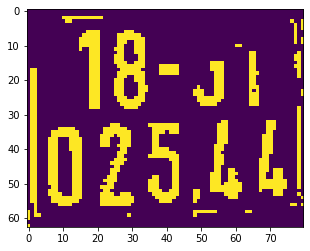

In [257]:
img_bin = cvt2bin(img_resized)
img_rmbound = remove_boundary(img_bin)
plt.imshow(img_rmbound)
cv2.imwrite('bbox/testrmb.jpg', img_rmbound)

5040 6 34 10 23
5040 35 33 9 23
5040 21 33 10 24
5040 67 32 8 22
5040 53 32 9 23
5040 48 15 9 13
5040 64 12 3 16
5040 25 6 10 23
5040 15 6 6 23


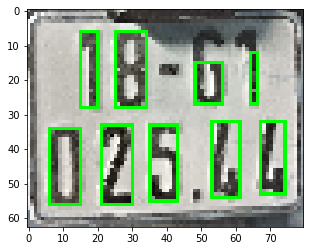

In [258]:
bounding_box = get_box(img_rmbound)
# # print(bounding_box)
img_bbox = show_img_with_bbox(img_resized, bounding_box)
cv2.imwrite('bbox/testbb.jpg', img_bbox)
plt.imshow(img_bbox)

In [259]:
def show_characters(img, bounding_box):
    fig, ax = plt.subplots(1, len(bounding_box), figsize=(15, 4))
    for i in range(len(bounding_box)):
        tl, br = bounding_box[i]
        if img.ndim == 2: #grayscale image
            ax[i].imshow(img[tl[1]:br[1]+1, tl[0]:br[0]+1], cmap='gray')
            cv2.imwrite('saved_images/'+str(i)+'.jpg', img[tl[1]:br[1]+1, tl[0]:br[0]+1])
        else: #ndim == 3
            ax[i].imshow(img[tl[1]:br[1]+1, tl[0]:br[0]+1, :])
            cv2.imwrite('saved_images/'+str(i)+'.jpg', img[tl[1]:br[1]+1, tl[0]:br[0]+1, :])
        ax[i].xaxis.set_visible(False)
        ax[i].yaxis.set_visible(False)

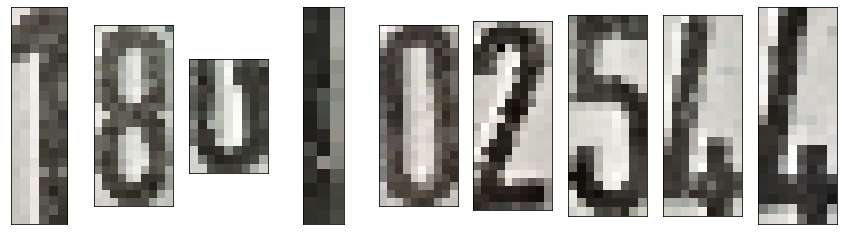

In [260]:
show_characters(img_resized, bounding_box)

### Load model

In [261]:
img.shape

(1655, 2092, 3)

In [262]:
ALPHA_DICT = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'K', 9: 'L', 10: 'M', 11: 'N', 12: 'P',
              13: 'R', 14: 'S', 15: 'T', 16: 'U', 17: 'V', 18: 'X', 19: 'Y', 20: 'Z', 21: '0', 22: '1', 23: '2', 24: '3',
              25: '4', 26: '5', 27: '6', 28: '7', 29: '8', 30: '9'}

In [263]:
import tensorflow as tf 

In [264]:
model = tf.keras.models.load_model('models/weight.38-0.1598-0.9516.hdf5')
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_164 (Conv2D)          (None, 32, 16, 32)        320       
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 30, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 15, 7, 32)         0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 15, 7, 32)         0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 15, 7, 64)         18496     
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 13, 5, 64)         36928     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 7, 3, 64)        

3


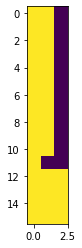

In [265]:
#path = 'bienso'
path = 'saved_images'
file_list = os.listdir(path)
# file_list = os.listdir('bienso')

n = random.randrange(len(file_list))
#n = 10
print(n)
img = cv2.imread(path+'/' + file_list[n])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.imshow(img)

In [266]:
### Test model
def get_prediction(model, imgs_list, type_list):
    ALPHA_DICT = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'K', 9: 'L', 10: 'M', 11: 'N', 12: 'P',
              13: 'R', 14: 'S', 15: 'T', 16: 'U', 17: 'V', 18: 'X', 19: 'Y', 20: 'Z', 21: '0', 22: '1', 23: '2', 24: '3',
              25: '4', 26: '5', 27: '6', 28: '7', 29: '8', 30: '9'}
    list_input = []
    list_out = []
    for image in imgs_list:
        if len(image.shape) == 4:
            image = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
        elif len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (16, 32))
        image = np.expand_dims(image.astype('float32')/255, axis = 2)
        list_input.append(image)
    confidences = model.predict(np.array(list_input))
    for i, conf in enumerate(confidences):
        if not type_list[i]:
            pred = np.argmax(conf[:21])
            out = ALPHA_DICT[pred]
        else:
            pred = np.argmax(conf[21:]) + 21
            out = ALPHA_DICT[pred]
        list_out.append(out)
        # print(out)
    return list_out


In [267]:
path = 'saved_images'
file_list = os.listdir(path)
print(len(file_list))
img_list = []
for image in file_list:
    img = cv2.imread(path+'/' + image, 0)
    if img is None:
        continue
#     img = cv2.cvtColor(img, cv2.THRESH_BINARY_INV)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    img_list.append(img)
    
type_list = [True for i in range(len(img_list))]
type_list[2] = False
ret = get_prediction(model, img_list, type_list)
print(ret)

9
['1', '8', 'U', '4', '0', '2', '5', '4', '4']


### SVM

In [268]:
import pickle
from scipy.spatial.distance import cdist

In [269]:
svm_NUM_DICT = {'0':0, '1':1, '2':2, '3':3, '4':4, '5': 5, '6':6, '7':7, '8':8, '9':9}
svm_ALPHA_DICT = {'A': ord('A'), 'B': ord('B'), 'C':ord('C'), 'D': ord('D'), 'E': ord('E'),
                  'F': ord('F'), 'G': ord('G'), 'H':ord('H'), 'K': ord('K'), 'L': ord('L'),
                  'M': ord('M'), 'N': ord('N'), 'P':ord('P'), 'R': ord('R'), 'S': ord('S'),
                  'T': ord('T'), 'U': ord('U'), 'V': ord('V'), 'X':ord('X'), 'Y': ord('Y'), 
                  'Z': ord('Z')
                 }

In [270]:
svm_num_clusters = 150

svm_num_BoW = pickle.load(open('svm/num_dictionary.pkl', 'rb'))
svm_num_pkl_filename = "svm/num_pickle_model.pkl"
svm_num_loaded_model = pickle.load(open(svm_num_pkl_filename, 'rb'))

svm_alpha_BoW = pickle.load(open('svm/alpha_dictionary.pkl', 'rb'))
svm_alpha_pkl_filename = "svm/alpha_pickle_model.pkl"
svm_alpha_loaded_model = pickle.load(open(svm_alpha_pkl_filename, 'rb'))

In [271]:
def svm_predict(images, isnum):
    number_plate = []
    for i,im in enumerate(images):
        # X = [img]
        img = cv2.resize(im,(9,21),interpolation=cv2.INTER_AREA)
        if isnum[i]:
            BoW = svm_num_BoW
            model = svm_num_loaded_model
            dic = svm_NUM_DICT
        else:
            BoW = svm_alpha_BoW
            model = svm_alpha_loaded_model
            dic = svm_ALPHA_DICT
        # if i == 2:
        #     continue   
        # image_descriptors = None
        # X_features = None
        # image_descriptors = extract_sift_features(X)
        # X_features = create_features_bow(image_descriptors, BoW, svm_num_clusters)
        number_plate.append(list(dic.keys())[list(dic.values()).index(model.predict(np.asarray(img.ravel()).reshape(1,-1)))])
    # print(number_plate)
    return number_plate

In [272]:
path = 'saved_images'
file_list = os.listdir(path)
img_list = []
for image in file_list:
    img = cv2.imread(path+'/' + image, 0)
#     img = cv2.cvtColor(img, cv2.THRESH_BINARY_INV)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    img_list.append(img)
    
len(img_list)

9

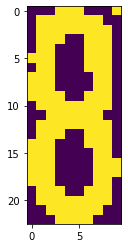

In [273]:
plt.imshow(img_list[1])

In [274]:
#img = cv2.imread(path+'/' + img_list[0])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
img_list[0].shape

(23, 6)

In [275]:
type_list = [True for i in range(len(img_list))]
type_list[2] = False
svm_predict(img_list, type_list)

['1', '8', 'U', '4', '0', '2', '5', '4', '4']